In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
x,y=[1,2,3],[1,2,3]
plt.plot(x,y)
plt.show()

<IPython.core.display.Javascript object>

In [2]:

x,y=[1,2,3],[1,2,3]
fig=plt.figure()
ax=plt.axes()
plt.plot(x,y)
print(plt.gcf(),plt.gca())
plt.show()

<IPython.core.display.Javascript object>

Figure(640x480) AxesSubplot(0.125,0.11;0.775x0.77)


In [3]:
def create_circle():
    circle=plt.Circle((0,0),radius=0.5)
    return circle

In [4]:
def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()

In [5]:
c=create_circle()
show_shape(c)

In [6]:
from matplotlib import pyplot as plt
from matplotlib import animation, rc

In [7]:
def update_radius(i,circle):
    circle.radius=i*0.5
    return circle,

In [8]:
from IPython.display import HTML
def create_animation():
    fig=plt.figure()
    ax=plt.axes(xlim=(-10,10),ylim=(-10,10))
    ax.set_aspect('equal')
    circle=create_circle()
    ax.add_patch(circle)
    anim=animation.FuncAnimation(
    fig,update_radius,fargs=(circle,),frames=30,interval=50,blit=True)
    plt.title('Simple Circle Animation')
    rc('animation', html='jshtml')
    #HTML(anim.to_jshtml())
    return anim
    

In [9]:

anim=create_animation()
#HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>

In [10]:
import math
g=9.8

In [11]:
def get_intervals(u,theta):
    t_flight=2*u*math.sin(theta)/g
    intervals=[]
    start=0
    interval=0.005
    while start<t_flight:
        intervals.append(start)
        start=start+interval
    return intervals

In [12]:
def update_position(i,circle,intervals,u,theta):
    t=intervals[i]
    x=u*math.cos(theta)*t
    y=u*math.sin(theta)*t-0.5*g*t*t
    circle.center=x,y
    return circle,


In [13]:
def create_animation(u,theta):
    intervals=get_intervals(u,theta)
    xmin,ymin=0,0
    t_max=u*math.sin(theta)/g
    xmax=u*math.cos(theta)*intervals[-1]
    ymax=u*math.sin(theta)*t_max-0.5*g*t_max**2
    fig=plt.gcf()
    ax=plt.axes(xlim=(xmin,xmax),ylim=(ymin,ymax))
    circle=plt.Circle((xmin,ymin),1.0)
    ax.add_patch(circle)
    
    anim=animation.FuncAnimation(fig,update_position,
                                fargs=(circle,intervals,u,theta),
                                frames=len(intervals),interval=2,
                                          repeat=False,blit=True)
    
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    rc('animation', html='jshtml')
    HTML(anim.to_jshtml())
    plt.show()
    return anim
    #plt.show()
    

In [14]:
try:
    u=float(input('Enter the initial velocity(m/s): '))
    theta=float(input('Enter the angle of projection (degrees): '))
except ValueError:
    print('You entered an invalid input')
else:
    theta=math.radians(theta)
    plt.figure()
    anim=create_animation(u,theta)

Enter the initial velocity(m/s): 20
Enter the angle of projection (degrees): 45


<IPython.core.display.Javascript object>

In [15]:
import random
def transformation_1(p):
    x,y=p
    return x+1,y-1
def transformation_2(p):
    x,y=p
    return x+1,y+1


In [19]:
def transform(p):
    transformations=[transformation_1,transformation_2]
    t=random.choice(transformations)
    x,y=t(p)
    return x,y

In [24]:
def build_trajectory(p,n):
    x=[p[0]]
    y=[p[1]]
    for _ in range(n):
        p=transform(p)
        x.append(p[0])
        y.append(p[1])
    return x,y


Enter number of iterations10000


<IPython.core.display.Javascript object>


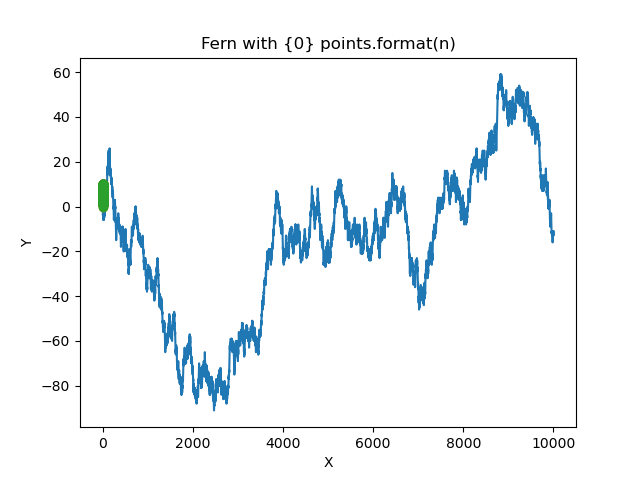

In [26]:
p=(1,1)
n=int(input('Enter number of iterations'))
x,y=build_trajectory(p,n)
plt.figure()
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Barnsley fern

In [29]:
def transformation_1(p):
    x,y=p
    xi= 0.85*x+0.04 *y
    yi= -0.04*x +0.85*y +1.6
    return xi,yi
def transformation_2(p):
    x,y=p
    xi= 0.2*x -0.26 *y
    yi= 0.23*x+ 0.22*y +1.6
    return xi,yi
def transformation_3(p):
    x,y=p
    xi= -0.15*x +0.28*y
    yi= 0.26*x +0.24*y +0.44
    return xi,yi
def transformation_4(p):
    x,y=p
    xi=0
    yi=0.16*y
    return xi,yi

In [30]:
def get_index(probability):
    r=random.random()
    c_probability=0
    sum_probability=[]
    for p in probability:
        c_probability+=p
        sum_probability.append(c_probability)
    for item,sp in enumerate(sum_probability):
        if r<=sp:
            return item
    return len(probability)-1

In [31]:
def transform(p):
    transformations=[transformation_1,transformation_2,transformation_3,transformation_4]
    probability=[0.85,0.07,0.07,0.01]
    tindex=get_index(probability)
    t=transformations[tindex]
    x,y=t(p)
    return x,y

In [32]:
def draw_fern(n):
    x,y=[0],[0]
    x1,y1=0,0
    for _ in range(n):
        x1,y1,=transform((x1,y1))
        x.append(x1)
        y.append(y1)
    return x,y

Enter number of points in Fern: 10000


<IPython.core.display.Javascript object>


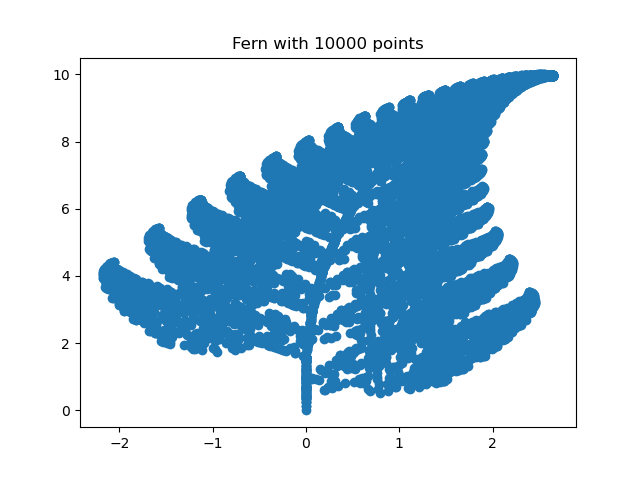

In [37]:
n=int(input('Enter number of points in Fern: '))
x,y=draw_fern(n)
plt.figure()
plt.plot(x,y,'o')
plt.title('Fern with {0} points'.format(n))
plt.show()